# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 -52.32 55.16 84.47 61.12 ... 467.4 340.0 429.7

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.7/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


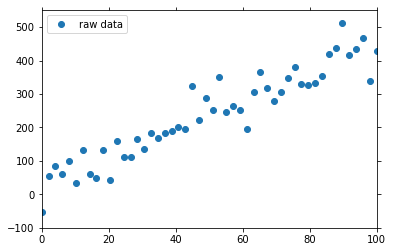

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

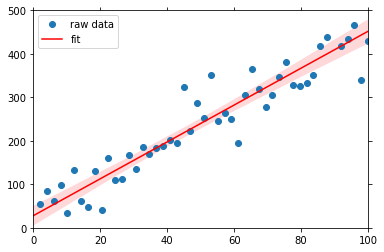

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 27.90314718,  32.18701045,  36.47087373,  40.75473701,
         45.03860028,  49.32246356,  53.60632683,  57.89019011,
         62.17405339,  66.45791666,  70.74177994,  75.02564322,
         79.30950649,  83.59336977,  87.87723305,  92.16109632,
         96.4449596 , 100.72882288, 105.01268615, 109.29654943,
        113.5804127 , 117.86427598, 122.14813926, 126.43200253,
        130.71586581, 134.99972909, 139.28359236, 143.56745564,
        147.85131892, 152.13518219, 156.41904547, 160.70290875,
        164.98677202, 169.2706353 , 173.55449857, 177.83836185,
        182.12222513, 186.4060884 , 190.68995168, 194.97381496,
        199.25767823, 203.54154151, 207.82540479, 212.10926806,
        216.39313134, 220.67699462, 224.96085789, 229.24472117,
        233.52858444, 237.81244772, 242.096311  , 246.38017427,
        250.66403755, 254.94790083, 259.2317641 , 263.51562738,
        267.79949066, 272.08335393, 276.36721721, 280.65108049,
        284.93494376, 289.21880704, 293.50267031, 297.78653359,
        302.07039687, 306.35426014, 310.63812342, 314.9219867 ,
        319.20584997, 323.48971325, 327.77357653, 332.0574398 ,
        336.34130308, 340.62516635, 344.90902963, 349.19289291,
        353.47675618, 357.76061946, 362.04448274, 366.32834601,
...
        129.72721467, 133.84720095, 137.73658618, 141.68249204,
        145.64420446, 149.65692691, 153.60385461, 157.65328793,
        161.70956919, 165.69673705, 169.66144898, 173.8787118 ,
        177.9501503 , 182.28651947, 186.55844682, 190.78256455,
        195.0986586 , 199.37156346, 203.64335672, 207.66935275,
        211.91695687, 215.81492852, 220.0512658 , 224.2819309 ,
        228.51259599, 232.56301323, 236.60734265, 241.18240886,
        245.46353685, 249.77078505, 254.04823332, 258.66116491,
        262.90474153, 267.40987574, 271.78915508, 276.16953747,
        280.62213652, 284.89975582, 289.44552404, 293.98565949,
        298.44313845, 303.05627728, 307.52269455, 312.24197767,
        316.9035079 , 321.40159613, 325.82407184, 330.48292061,
        335.10164494, 339.60811958, 344.12349164, 348.6653936 ,
        353.43908231, 357.7108005 , 362.23298283, 366.82842461,
        371.53190313, 376.29972457, 381.0129821 , 385.63979139,
        390.33929942, 395.03880745, 399.73831548, 404.43782351,
        409.13733153, 413.83683956, 418.53634759, 423.23585562,
        427.9113592 , 432.55168551, 437.16097068, 441.75579314,
        446.38843775, 451.11934352, 455.89001417, 460.51210507,
        465.38681921, 470.03967469, 474.61521448, 479.19075427]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      4.241024643654057
    intercept:  27.90314717634283
    rsquared:   0.8887275956056283

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

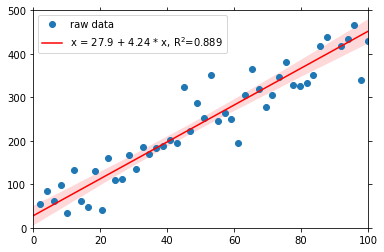

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

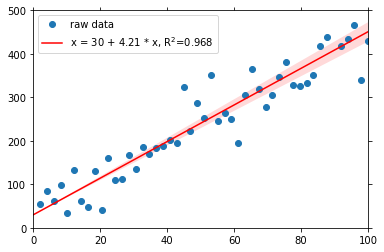

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

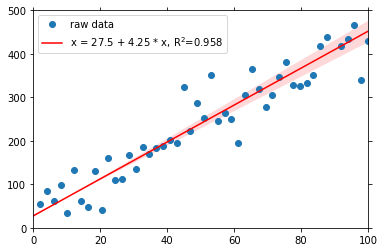

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')